<a href="https://colab.research.google.com/github/habibaelgendy/Thesis/blob/main/_Copy_2_of_Habiba_RF_thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn



%matplotlib inline
plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/habibaelgendy/Thesis/main/new%20responses%20-%20Copy.csv')

df.head()

<ipython-input-210-a6a42a4fd7ef>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


,Timestamp,Age,Gender,Nationality,High_School_System,High_School_Grade,Economic_Status,Scholarship,Attendance,Failed_Courses,...,Teacher_Knowledge,Teacher_Self_Motivation,Teacher_Self_Confidence,Teacher_Openness,Fear_Of_Failure,Working_Hard,Pass_Course,Avoiding_Punishment,Rewards,University_System
0,3/26/2023 17:46,18-24 years old,Female,Egyptian,IGCSE,90%-100%,Medium,Yes,>60%,0,...,4,Yes,Yes,No,4,5,3,3,4,NaN
1,3/26/2023 17:48,18-24 years old,Female,Egyptian,IGCSE,65%-69%,High,No,>40%,0,...,3,No,Yes,No,3,3,3,3,3,NaN
2,3/27/2023 19:05,18-24 years old,Female,Egyptian,IGCSE,90%-100%,Medium,No,>80%,0,...,2,Yes,No,No,5,5,5,2,5,NaN
3,3/27/2023 19:06,18-24 years old,Female,egyptian,IGCSE,90%-100%,Medium,No,>80%,3,...,4,No,Yes,No,4,4,5,1,4,NaN
4,3/27/2023 19:07,18-24 years old,Female,Egyptian,IGCSE,90%-100%,Medium,No,>80%,0,...,4,Yes,Yes,Yes,5,5,2,2,4,NaN


In [211]:
#Dropping columns
df.drop(['Timestamp', 'GPA', 'University_System', 'High_School_System', 'High_School_Grade', 'Economic_Status', 'Scholarship'],
             axis="columns", inplace=True)
df['Rank'] = df['Rank'].astype('category').cat.codes
df

,Age,Gender,Nationality,Attendance,Failed_Courses,Grade,Rank,Extroversion,Calmness,Failure_Tolerance,...,School_Belongingness,Teacher_Knowledge,Teacher_Self_Motivation,Teacher_Self_Confidence,Teacher_Openness,Fear_Of_Failure,Working_Hard,Pass_Course,Avoiding_Punishment,Rewards
0,18-24 years old,Female,Egyptian,>60%,0,A+,0,4,4,5,...,Yes,4,Yes,Yes,No,4,5,3,3,4
1,18-24 years old,Female,Egyptian,>40%,0,A+,0,1,2,2,...,Yes,3,No,Yes,No,3,3,3,3,3
2,18-24 years old,Female,Egyptian,>80%,0,B+,3,4,3,2,...,Yes,2,Yes,No,No,5,5,5,2,5
3,18-24 years old,Female,egyptian,>80%,3,B-,3,2,5,5,...,No,4,No,Yes,No,4,4,5,1,4
4,18-24 years old,Female,Egyptian,>80%,0,A,0,4,3,2,...,Yes,4,Yes,Yes,Yes,5,5,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,18-24 years old,Female,Egyptian,> 80%,1,B,3,4,4,4,...,Yes,3,Yes,Yes,Yes,4,4,4,4,5
184,18-24 years old,Female,Egyptian,> 80%,0,A,0,3,2,2,...,Yes,4,No,Yes,No,5,4,1,1,3
185,18-24 years old,Female,Egyptian/ Japanese,> 80%,0,B-,3,3,4,4,...,Yes,4,No,No,No,4,3,4,1,4
186,18-24 years old,Male,Egyptian,> 80%,0,A-,0,4,3,4,...,Yes,5,Yes,Yes,No,5,4,2,2,4


In [212]:
#Knowing the number of unique values and what are they in the columns.
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")
categorical_col = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

df

Age: Number of unique values 4
Gender : Number of unique values 2
Nationality: Number of unique values 13
Attendance: Number of unique values 6
Failed_Courses: Number of unique values 14
Grade: Number of unique values 10
Rank: Number of unique values 5
Extroversion: Number of unique values 5
Calmness: Number of unique values 5
Failure_Tolerance: Number of unique values 5
Self_Confidence: Number of unique values 5
Procrastination: Number of unique values 5
Self_Motivation : Number of unique values 5
Peer_Pressure: Number of unique values 5
Group_Study: Number of unique values 2
Peer_Support: Number of unique values 2
Teacher_Support: Number of unique values 2
Teacher_Closeness: Number of unique values 5
School_Belongingness: Number of unique values 2
Teacher_Knowledge: Number of unique values 5
Teacher_Self_Motivation: Number of unique values 2
Teacher_Self_Confidence: Number of unique values 2
Teacher_Openness: Number of unique values 2
Fear_Of_Failure: Number of unique values 5
Workin

,Age,Gender,Nationality,Attendance,Failed_Courses,Grade,Rank,Extroversion,Calmness,Failure_Tolerance,...,School_Belongingness,Teacher_Knowledge,Teacher_Self_Motivation,Teacher_Self_Confidence,Teacher_Openness,Fear_Of_Failure,Working_Hard,Pass_Course,Avoiding_Punishment,Rewards
0,18-24 years old,Female,Egyptian,>60%,0,A+,0,4,4,5,...,Yes,4,Yes,Yes,No,4,5,3,3,4
1,18-24 years old,Female,Egyptian,>40%,0,A+,0,1,2,2,...,Yes,3,No,Yes,No,3,3,3,3,3
2,18-24 years old,Female,Egyptian,>80%,0,B+,3,4,3,2,...,Yes,2,Yes,No,No,5,5,5,2,5
3,18-24 years old,Female,egyptian,>80%,3,B-,3,2,5,5,...,No,4,No,Yes,No,4,4,5,1,4
4,18-24 years old,Female,Egyptian,>80%,0,A,0,4,3,2,...,Yes,4,Yes,Yes,Yes,5,5,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,18-24 years old,Female,Egyptian,> 80%,1,B,3,4,4,4,...,Yes,3,Yes,Yes,Yes,4,4,4,4,5
184,18-24 years old,Female,Egyptian,> 80%,0,A,0,3,2,2,...,Yes,4,No,Yes,No,5,4,1,1,3
185,18-24 years old,Female,Egyptian/ Japanese,> 80%,0,B-,3,3,4,4,...,Yes,4,No,No,No,4,3,4,1,4
186,18-24 years old,Male,Egyptian,> 80%,0,A-,0,4,3,4,...,Yes,5,Yes,Yes,No,5,4,2,2,4


In [213]:
#Replacing the values

df['Attendance'] = df['Attendance'].str.replace('>','')
df['Attendance'] = df['Attendance'].str.replace('%','').astype(float)
df['Attendance'] = (df['Attendance'] / 100).round(2)

df['Nationality']=df['Nationality'].replace(to_replace=["Egyptian ", "egyptian", "Egypt", "egyptian ", "Egyptain ", "Egyption ", "Egypt ", "Egyptian/ Japanese "], value="Egyptian" )
df['Failed_Courses']=df['Failed_Courses'].replace(to_replace=["None", "Zero", "none", "None "], value="0" )
df['Failed_Courses']=df['Failed_Courses'].replace(to_replace=["One"], value="1" )
df['Failed_Courses']=df['Failed_Courses'].astype(int)

df['Age']=df['Age'].replace(to_replace=["18-24 years old"], value="18-24" )
df['Age']=df['Age'].replace(to_replace=["25-35 years old"], value="25-35" )


df

,Age,Gender,Nationality,Attendance,Failed_Courses,Grade,Rank,Extroversion,Calmness,Failure_Tolerance,...,School_Belongingness,Teacher_Knowledge,Teacher_Self_Motivation,Teacher_Self_Confidence,Teacher_Openness,Fear_Of_Failure,Working_Hard,Pass_Course,Avoiding_Punishment,Rewards
0,18-24,Female,Egyptian,0.6,0,A+,0,4,4,5,...,Yes,4,Yes,Yes,No,4,5,3,3,4
1,18-24,Female,Egyptian,0.4,0,A+,0,1,2,2,...,Yes,3,No,Yes,No,3,3,3,3,3
2,18-24,Female,Egyptian,0.8,0,B+,3,4,3,2,...,Yes,2,Yes,No,No,5,5,5,2,5
3,18-24,Female,Egyptian,0.8,3,B-,3,2,5,5,...,No,4,No,Yes,No,4,4,5,1,4
4,18-24,Female,Egyptian,0.8,0,A,0,4,3,2,...,Yes,4,Yes,Yes,Yes,5,5,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,18-24,Female,Egyptian,0.8,1,B,3,4,4,4,...,Yes,3,Yes,Yes,Yes,4,4,4,4,5
184,18-24,Female,Egyptian,0.8,0,A,0,3,2,2,...,Yes,4,No,Yes,No,5,4,1,1,3
185,18-24,Female,Egyptian,0.8,0,B-,3,3,4,4,...,Yes,4,No,No,No,4,3,4,1,4
186,18-24,Male,Egyptian,0.8,0,A-,0,4,3,4,...,Yes,5,Yes,Yes,No,5,4,2,2,4


In [214]:
df = df.drop("Nationality", axis='columns')

In [215]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      188 non-null    object 
 1   Gender                   188 non-null    object 
 2   Attendance               188 non-null    float64
 3   Failed_Courses           188 non-null    int64  
 4   Grade                    182 non-null    object 
 5   Rank                     188 non-null    int8   
 6   Extroversion             188 non-null    int64  
 7   Calmness                 188 non-null    int64  
 8   Failure_Tolerance        188 non-null    int64  
 9   Self_Confidence          188 non-null    int64  
 10  Procrastination          188 non-null    int64  
 11  Self_Motivation          188 non-null    int64  
 12  Peer_Pressure            188 non-null    int64  
 13  Group_Study              188 non-null    object 
 14  Peer_Support             1

In [216]:
df.isnull().sum()

Age                        0
Gender                     0
Attendance                 0
Failed_Courses             0
Grade                      6
Rank                       0
Extroversion               0
Calmness                   0
Failure_Tolerance          0
Self_Confidence            0
Procrastination            0
Self_Motivation            0
Peer_Pressure              0
Group_Study                0
Peer_Support               0
Teacher_Support            0
Teacher_Closeness          0
School_Belongingness       0
Teacher_Knowledge          0
Teacher_Self_Motivation    0
Teacher_Self_Confidence    0
Teacher_Openness           0
Fear_Of_Failure            0
Working_Hard               0
Pass_Course                0
Avoiding_Punishment        0
Rewards                    0
dtype: int64

In [217]:
df = df.dropna()

In [218]:
df.isnull().sum()

Age                        0
Gender                     0
Attendance                 0
Failed_Courses             0
Grade                      0
Rank                       0
Extroversion               0
Calmness                   0
Failure_Tolerance          0
Self_Confidence            0
Procrastination            0
Self_Motivation            0
Peer_Pressure              0
Group_Study                0
Peer_Support               0
Teacher_Support            0
Teacher_Closeness          0
School_Belongingness       0
Teacher_Knowledge          0
Teacher_Self_Motivation    0
Teacher_Self_Confidence    0
Teacher_Openness           0
Fear_Of_Failure            0
Working_Hard               0
Pass_Course                0
Avoiding_Punishment        0
Rewards                    0
dtype: int64

In [219]:
df['Age'] = pd.Categorical(df['Age'], 
                                      categories=['below 18', '18-24', '25-35', 'above 35'], 
                                      ordered=True)


<ipython-input-220-7462da0c6a41>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

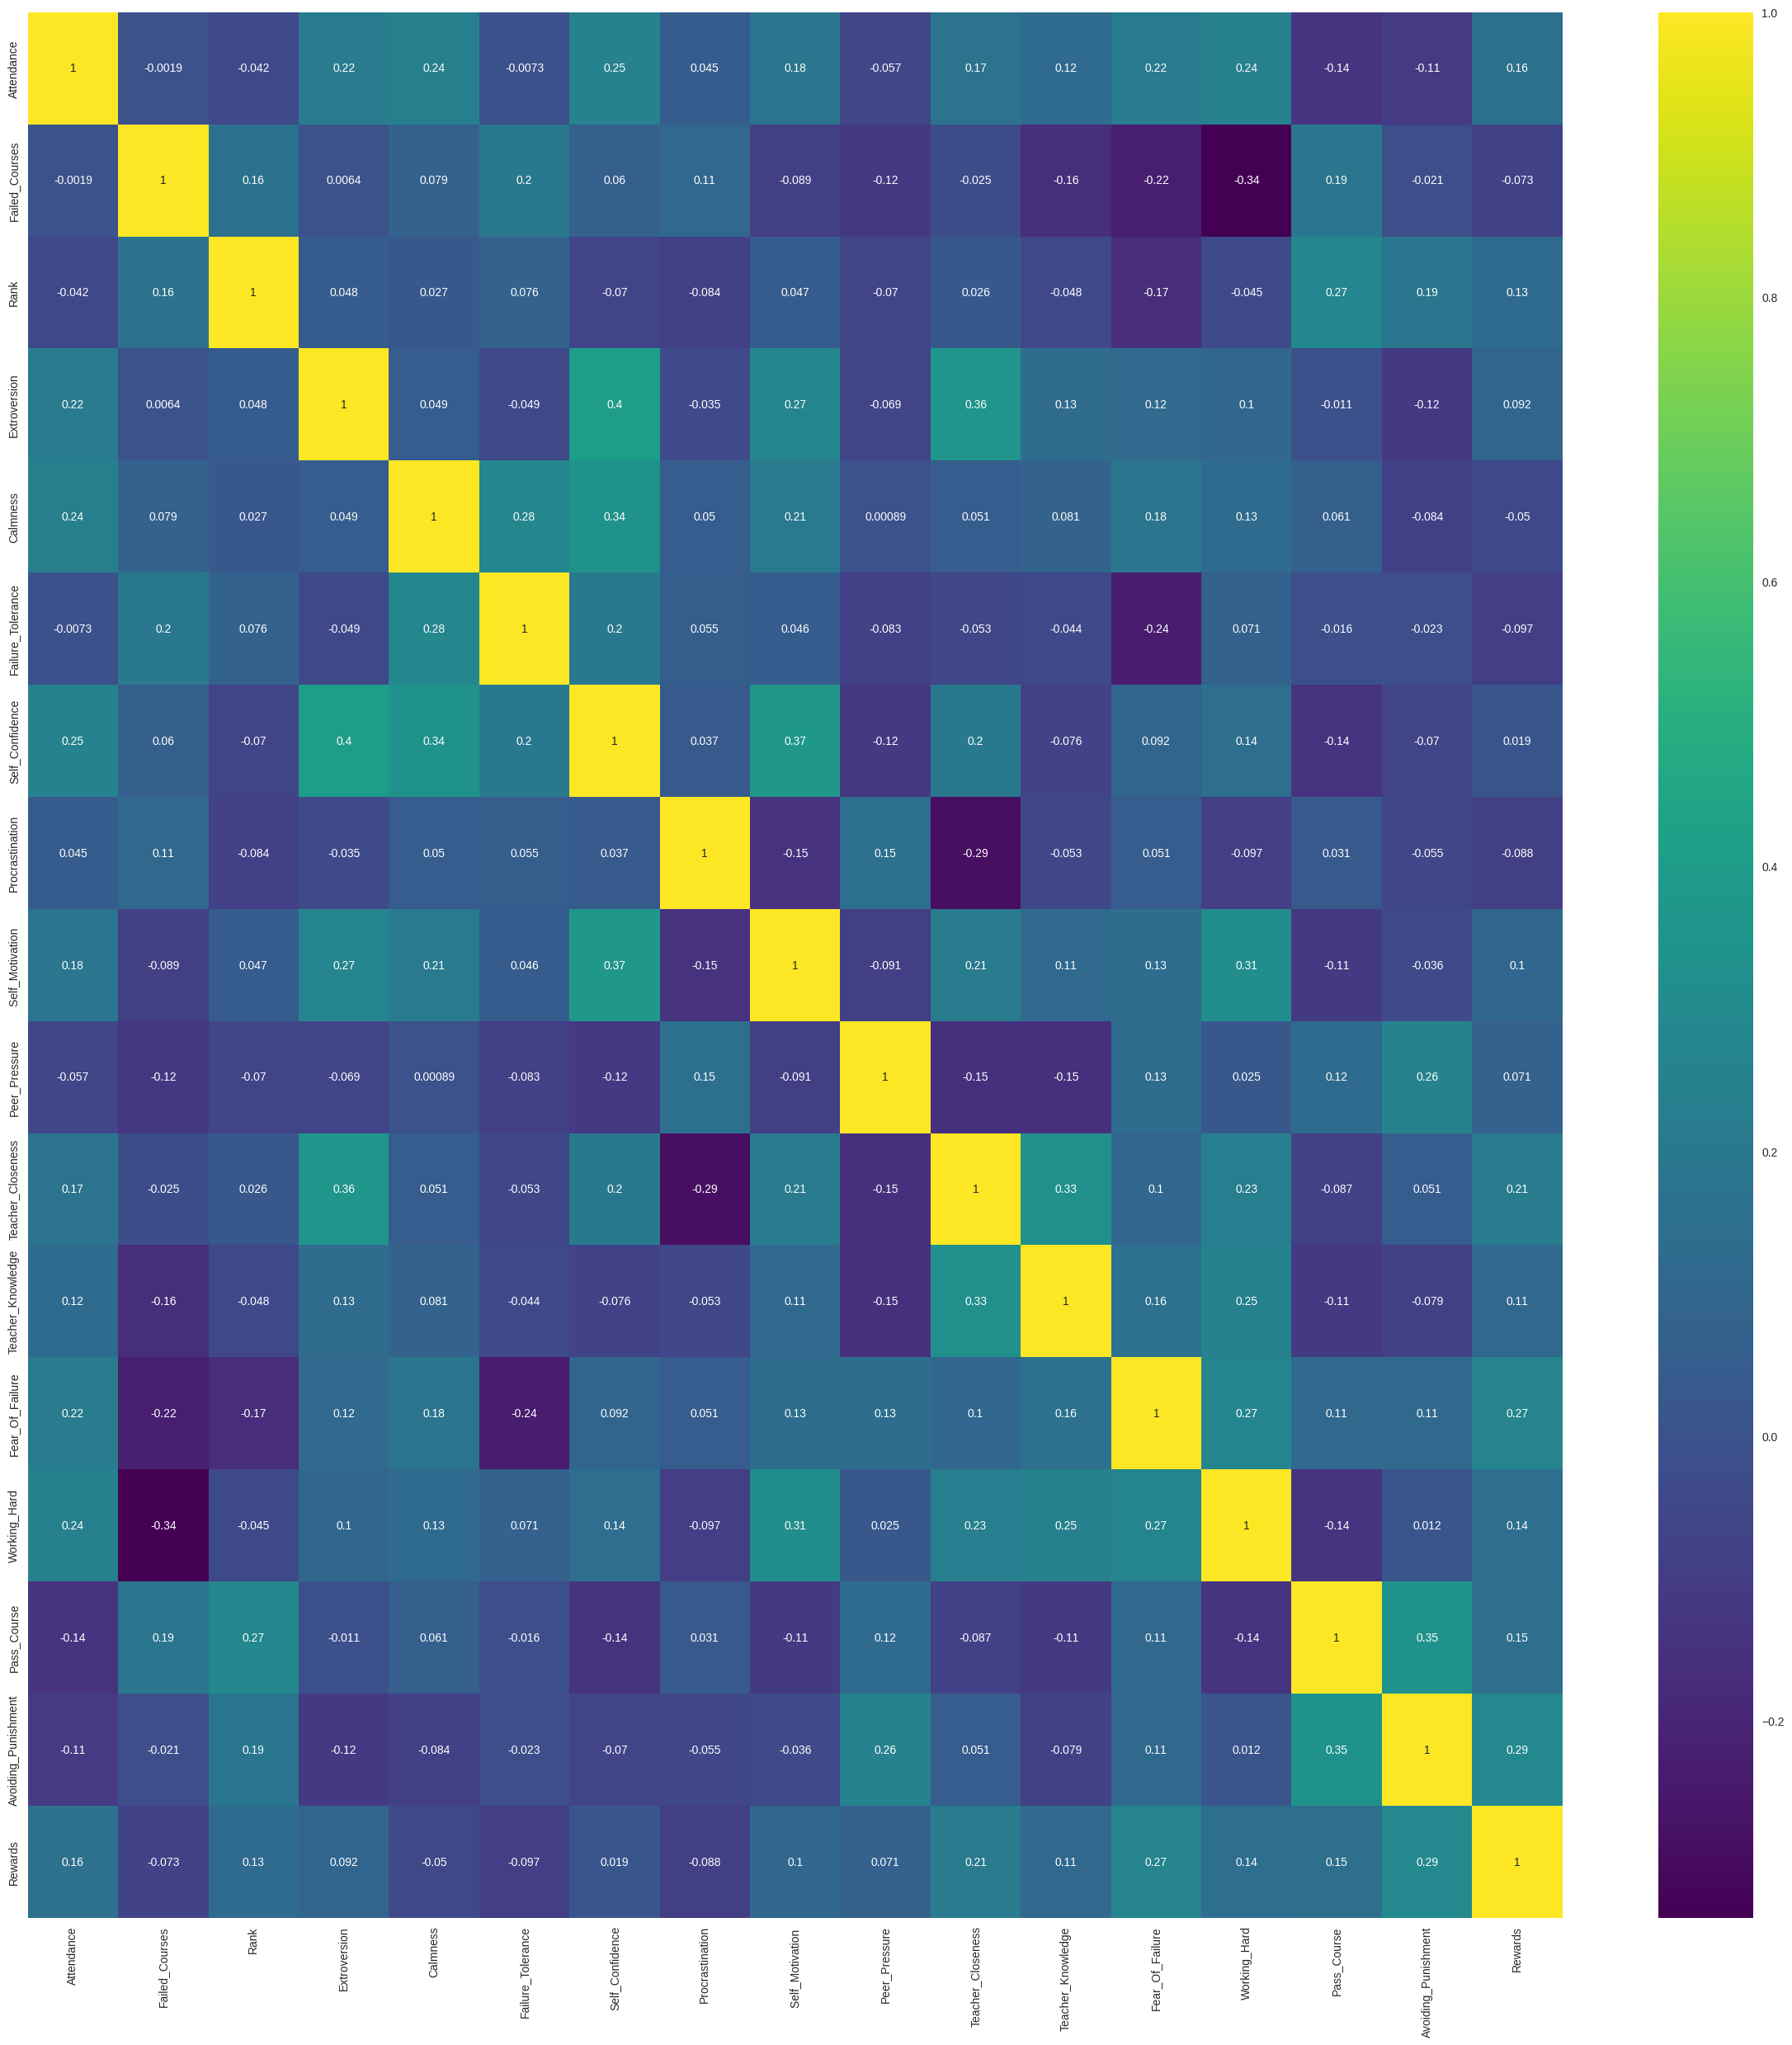

In [220]:
# to improve the plot's clarity, it will be set to a larger size using the line below
plt.figure(figsize=(30,30))

corr = df.corr()
corr

sns.heatmap(corr, cmap='viridis', annot=True)

label encoding

In [221]:
df_encoded = df.copy()
df_encoded['Age'] = df_encoded['Age'].astype('category').cat.codes

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 187
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      182 non-null    int8   
 1   Gender                   182 non-null    object 
 2   Attendance               182 non-null    float64
 3   Failed_Courses           182 non-null    int64  
 4   Grade                    182 non-null    object 
 5   Rank                     182 non-null    int8   
 6   Extroversion             182 non-null    int64  
 7   Calmness                 182 non-null    int64  
 8   Failure_Tolerance        182 non-null    int64  
 9   Self_Confidence          182 non-null    int64  
 10  Procrastination          182 non-null    int64  
 11  Self_Motivation          182 non-null    int64  
 12  Peer_Pressure            182 non-null    int64  
 13  Group_Study              182 non-null    object 
 14  Peer_Support             1

In [222]:
categorical_columns = df.select_dtypes(include= [object, 'category']).columns
df_encoded = pd.get_dummies(data=df,
                           columns=categorical_columns,
                           dtype='int8')
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 187
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Attendance                   182 non-null    float64
 1   Failed_Courses               182 non-null    int64  
 2   Rank                         182 non-null    int8   
 3   Extroversion                 182 non-null    int64  
 4   Calmness                     182 non-null    int64  
 5   Failure_Tolerance            182 non-null    int64  
 6   Self_Confidence              182 non-null    int64  
 7   Procrastination              182 non-null    int64  
 8   Self_Motivation              182 non-null    int64  
 9   Peer_Pressure                182 non-null    int64  
 10  Teacher_Closeness            182 non-null    int64  
 11  Teacher_Knowledge            182 non-null    int64  
 12  Fear_Of_Failure              182 non-null    int64  
 13  Working_Hard        

In [223]:
df_encoded.drop(['Gender _Female', 'Group_Study_No', 'Peer_Support_No', 'Teacher_Support_No',
                 'School_Belongingness_No', 'Teacher_Self_Motivation_No', 'Teacher_Self_Confidence_No', 'Teacher_Openness_No'], axis='columns', inplace=True)
df_encoded.columns

Index(['Attendance', 'Failed_Courses', 'Rank', 'Extroversion', 'Calmness',
       'Failure_Tolerance', 'Self_Confidence', 'Procrastination',
       'Self_Motivation ', 'Peer_Pressure', 'Teacher_Closeness',
       'Teacher_Knowledge', 'Fear_Of_Failure', 'Working_Hard', 'Pass_Course',
       'Avoiding_Punishment', 'Rewards', 'Age_below 18', 'Age_18-24',
       'Age_25-35', 'Age_above 35', 'Gender _Male', 'Grade_A', 'Grade_A+',
       'Grade_A-', 'Grade_B', 'Grade_B+', 'Grade_B-', 'Grade_C', 'Grade_C+',
       'Grade_C-', 'Grade_D', 'Group_Study_Yes', 'Peer_Support_Yes',
       'Teacher_Support_Yes', 'School_Belongingness_Yes',
       'Teacher_Self_Motivation_Yes', 'Teacher_Self_Confidence_Yes',
       'Teacher_Openness_Yes'],
      dtype='object')

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 187
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      181 non-null    category
 1   Gender                   182 non-null    object  
 2   Attendance               182 non-null    float64 
 3   Failed_Courses           182 non-null    int64   
 4   Grade                    182 non-null    object  
 5   Rank                     182 non-null    int8    
 6   Extroversion             182 non-null    int64   
 7   Calmness                 182 non-null    int64   
 8   Failure_Tolerance        182 non-null    int64   
 9   Self_Confidence          182 non-null    int64   
 10  Procrastination          182 non-null    int64   
 11  Self_Motivation          182 non-null    int64   
 12  Peer_Pressure            182 non-null    int64   
 13  Group_Study              182 non-null    object  
 14  Peer_Suppo

In [225]:
df_corr=df.copy()
df_corr['Age'] = df_corr['Age'].astype('category').cat.codes

df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 187
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      182 non-null    int8   
 1   Gender                   182 non-null    object 
 2   Attendance               182 non-null    float64
 3   Failed_Courses           182 non-null    int64  
 4   Grade                    182 non-null    object 
 5   Rank                     182 non-null    int8   
 6   Extroversion             182 non-null    int64  
 7   Calmness                 182 non-null    int64  
 8   Failure_Tolerance        182 non-null    int64  
 9   Self_Confidence          182 non-null    int64  
 10  Procrastination          182 non-null    int64  
 11  Self_Motivation          182 non-null    int64  
 12  Peer_Pressure            182 non-null    int64  
 13  Group_Study              182 non-null    object 
 14  Peer_Support             1

In [226]:
#df_corr['Gender'] = df_corr['Gender'].astype('category').cat.codes
df_corr['Grade'] = df_corr['Grade'].astype('category').cat.codes
df_corr['Group_Study'] = df_corr['Group_Study'].astype('category').cat.codes
df_corr['Peer_Support'] = df_corr['Peer_Support'].astype('category').cat.codes
df_corr['Teacher_Support'] = df_corr['Teacher_Support'].astype('category').cat.codes
df_corr['School_Belongingness'] = df_corr['School_Belongingness'].astype('category').cat.codes
df_corr['Teacher_Self_Motivation'] = df_corr['Teacher_Self_Motivation'].astype('category').cat.codes
df_corr['Teacher_Self_Confidence'] = df_corr['Teacher_Self_Confidence'].astype('category').cat.codes
df_corr['Teacher_Openness'] = df_corr['Teacher_Openness'].astype('category').cat.codes

df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 187
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      182 non-null    int8   
 1   Gender                   182 non-null    object 
 2   Attendance               182 non-null    float64
 3   Failed_Courses           182 non-null    int64  
 4   Grade                    182 non-null    int8   
 5   Rank                     182 non-null    int8   
 6   Extroversion             182 non-null    int64  
 7   Calmness                 182 non-null    int64  
 8   Failure_Tolerance        182 non-null    int64  
 9   Self_Confidence          182 non-null    int64  
 10  Procrastination          182 non-null    int64  
 11  Self_Motivation          182 non-null    int64  
 12  Peer_Pressure            182 non-null    int64  
 13  Group_Study              182 non-null    int8   
 14  Peer_Support             1

In [227]:
df.head()

,Age,Gender,Attendance,Failed_Courses,Grade,Rank,Extroversion,Calmness,Failure_Tolerance,Self_Confidence,...,School_Belongingness,Teacher_Knowledge,Teacher_Self_Motivation,Teacher_Self_Confidence,Teacher_Openness,Fear_Of_Failure,Working_Hard,Pass_Course,Avoiding_Punishment,Rewards
0,18-24,Female,0.6,0,A+,0,4,4,5,5,...,Yes,4,Yes,Yes,No,4,5,3,3,4
1,18-24,Female,0.4,0,A+,0,1,2,2,1,...,Yes,3,No,Yes,No,3,3,3,3,3
2,18-24,Female,0.8,0,B+,3,4,3,2,3,...,Yes,2,Yes,No,No,5,5,5,2,5
3,18-24,Female,0.8,3,B-,3,2,5,5,4,...,No,4,No,Yes,No,4,4,5,1,4
4,18-24,Female,0.8,0,A,0,4,3,2,3,...,Yes,4,Yes,Yes,Yes,5,5,2,2,4


In [228]:
df_corr.head()

,Age,Gender,Attendance,Failed_Courses,Grade,Rank,Extroversion,Calmness,Failure_Tolerance,Self_Confidence,...,School_Belongingness,Teacher_Knowledge,Teacher_Self_Motivation,Teacher_Self_Confidence,Teacher_Openness,Fear_Of_Failure,Working_Hard,Pass_Course,Avoiding_Punishment,Rewards
0,1,Female,0.6,0,1,0,4,4,5,5,...,1,4,1,1,0,4,5,3,3,4
1,1,Female,0.4,0,1,0,1,2,2,1,...,1,3,0,1,0,3,3,3,3,3
2,1,Female,0.8,0,4,3,4,3,2,3,...,1,2,1,0,0,5,5,5,2,5
3,1,Female,0.8,3,5,3,2,5,5,4,...,0,4,0,1,0,4,4,5,1,4
4,1,Female,0.8,0,0,0,4,3,2,3,...,1,4,1,1,1,5,5,2,2,4


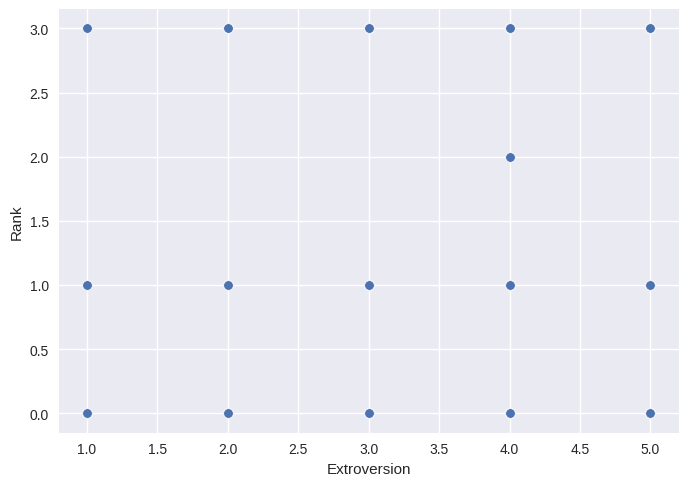

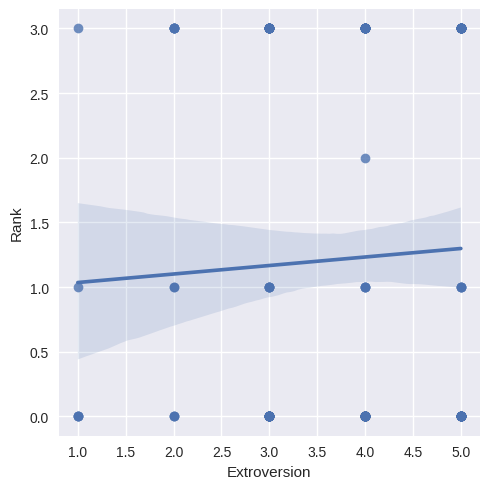

In [229]:
import seaborn as sns
df_corr['Extroversion'].corr(df_corr['Rank'])
sns.scatterplot(x="Extroversion", y="Rank", data=df_corr);
sns.lmplot(x="Extroversion", y="Rank", data=df_corr);

In [230]:
cormat = df_corr.corr()
round(cormat,3)

<ipython-input-230-ea059f1544b6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = df_corr.corr()


,Age,Attendance,Failed_Courses,Grade,Rank,Extroversion,Calmness,Failure_Tolerance,Self_Confidence,Procrastination,...,School_Belongingness,Teacher_Knowledge,Teacher_Self_Motivation,Teacher_Self_Confidence,Teacher_Openness,Fear_Of_Failure,Working_Hard,Pass_Course,Avoiding_Punishment,Rewards
Age,1.000,-0.027,0.111,0.007,-0.057,0.056,0.041,-0.068,0.084,-0.165,...,0.081,-0.171,-0.016,-0.154,0.033,0.088,0.034,0.071,0.029,0.152
Attendance,-0.027,1.000,-0.002,-0.200,-0.042,0.220,0.236,-0.007,0.250,0.045,...,0.145,0.123,0.145,0.260,0.101,0.215,0.241,-0.137,-0.107,0.157
Failed_Courses,0.111,-0.002,1.000,0.389,0.164,0.006,0.079,0.199,0.060,0.107,...,-0.130,-0.163,-0.076,-0.106,-0.012,-0.224,-0.338,0.186,-0.021,-0.073
Grade,0.007,-0.200,0.389,1.000,0.682,-0.016,-0.053,0.048,-0.126,-0.070,...,-0.110,-0.107,-0.070,-0.179,0.022,-0.257,-0.104,0.324,0.147,0.015
Rank,-0.057,-0.042,0.164,0.682,1.000,0.048,0.027,0.076,-0.070,-0.084,...,-0.014,-0.048,-0.000,0.006,0.147,-0.169,-0.045,0.275,0.186,0.125
Extroversion,0.056,0.220,0.006,-0.016,0.048,1.000,0.049,-0.049,0.403,-0.035,...,0.253,0.130,0.285,0.193,0.193,0.118,0.105,-0.011,-0.116,0.092
Calmness,0.041,0.236,0.079,-0.053,0.027,0.049,1.000,0.284,0.341,0.050,...,-0.048,0.081,0.051,0.123,-0.010,0.181,0.126,0.061,-0.084,-0.050
Failure_Tolerance,-0.068,-0.007,0.199,0.048,0.076,-0.049,0.284,1.000,0.201,0.055,...,-0.096,-0.044,-0.082,-0.047,-0.061,-0.238,0.071,-0.016,-0.023,-0.097
Self_Confidence,0.084,0.250,0.060,-0.126,-0.070,0.403,0.341,0.201,1.000,0.037,...,-0.051,-0.076,0.143,0.084,0.074,0.092,0.139,-0.142,-0.070,0.019
Procrastination,-0.165,0.045,0.107,-0.070,-0.084,-0.035,0.050,0.055,0.037,1.000,...,-0.151,-0.053,-0.134,0.035,-0.083,0.051,-0.097,0.031,-0.055,-0.088


<ipython-input-231-0c5fc80068de>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_corr.corr()


<Axes: >

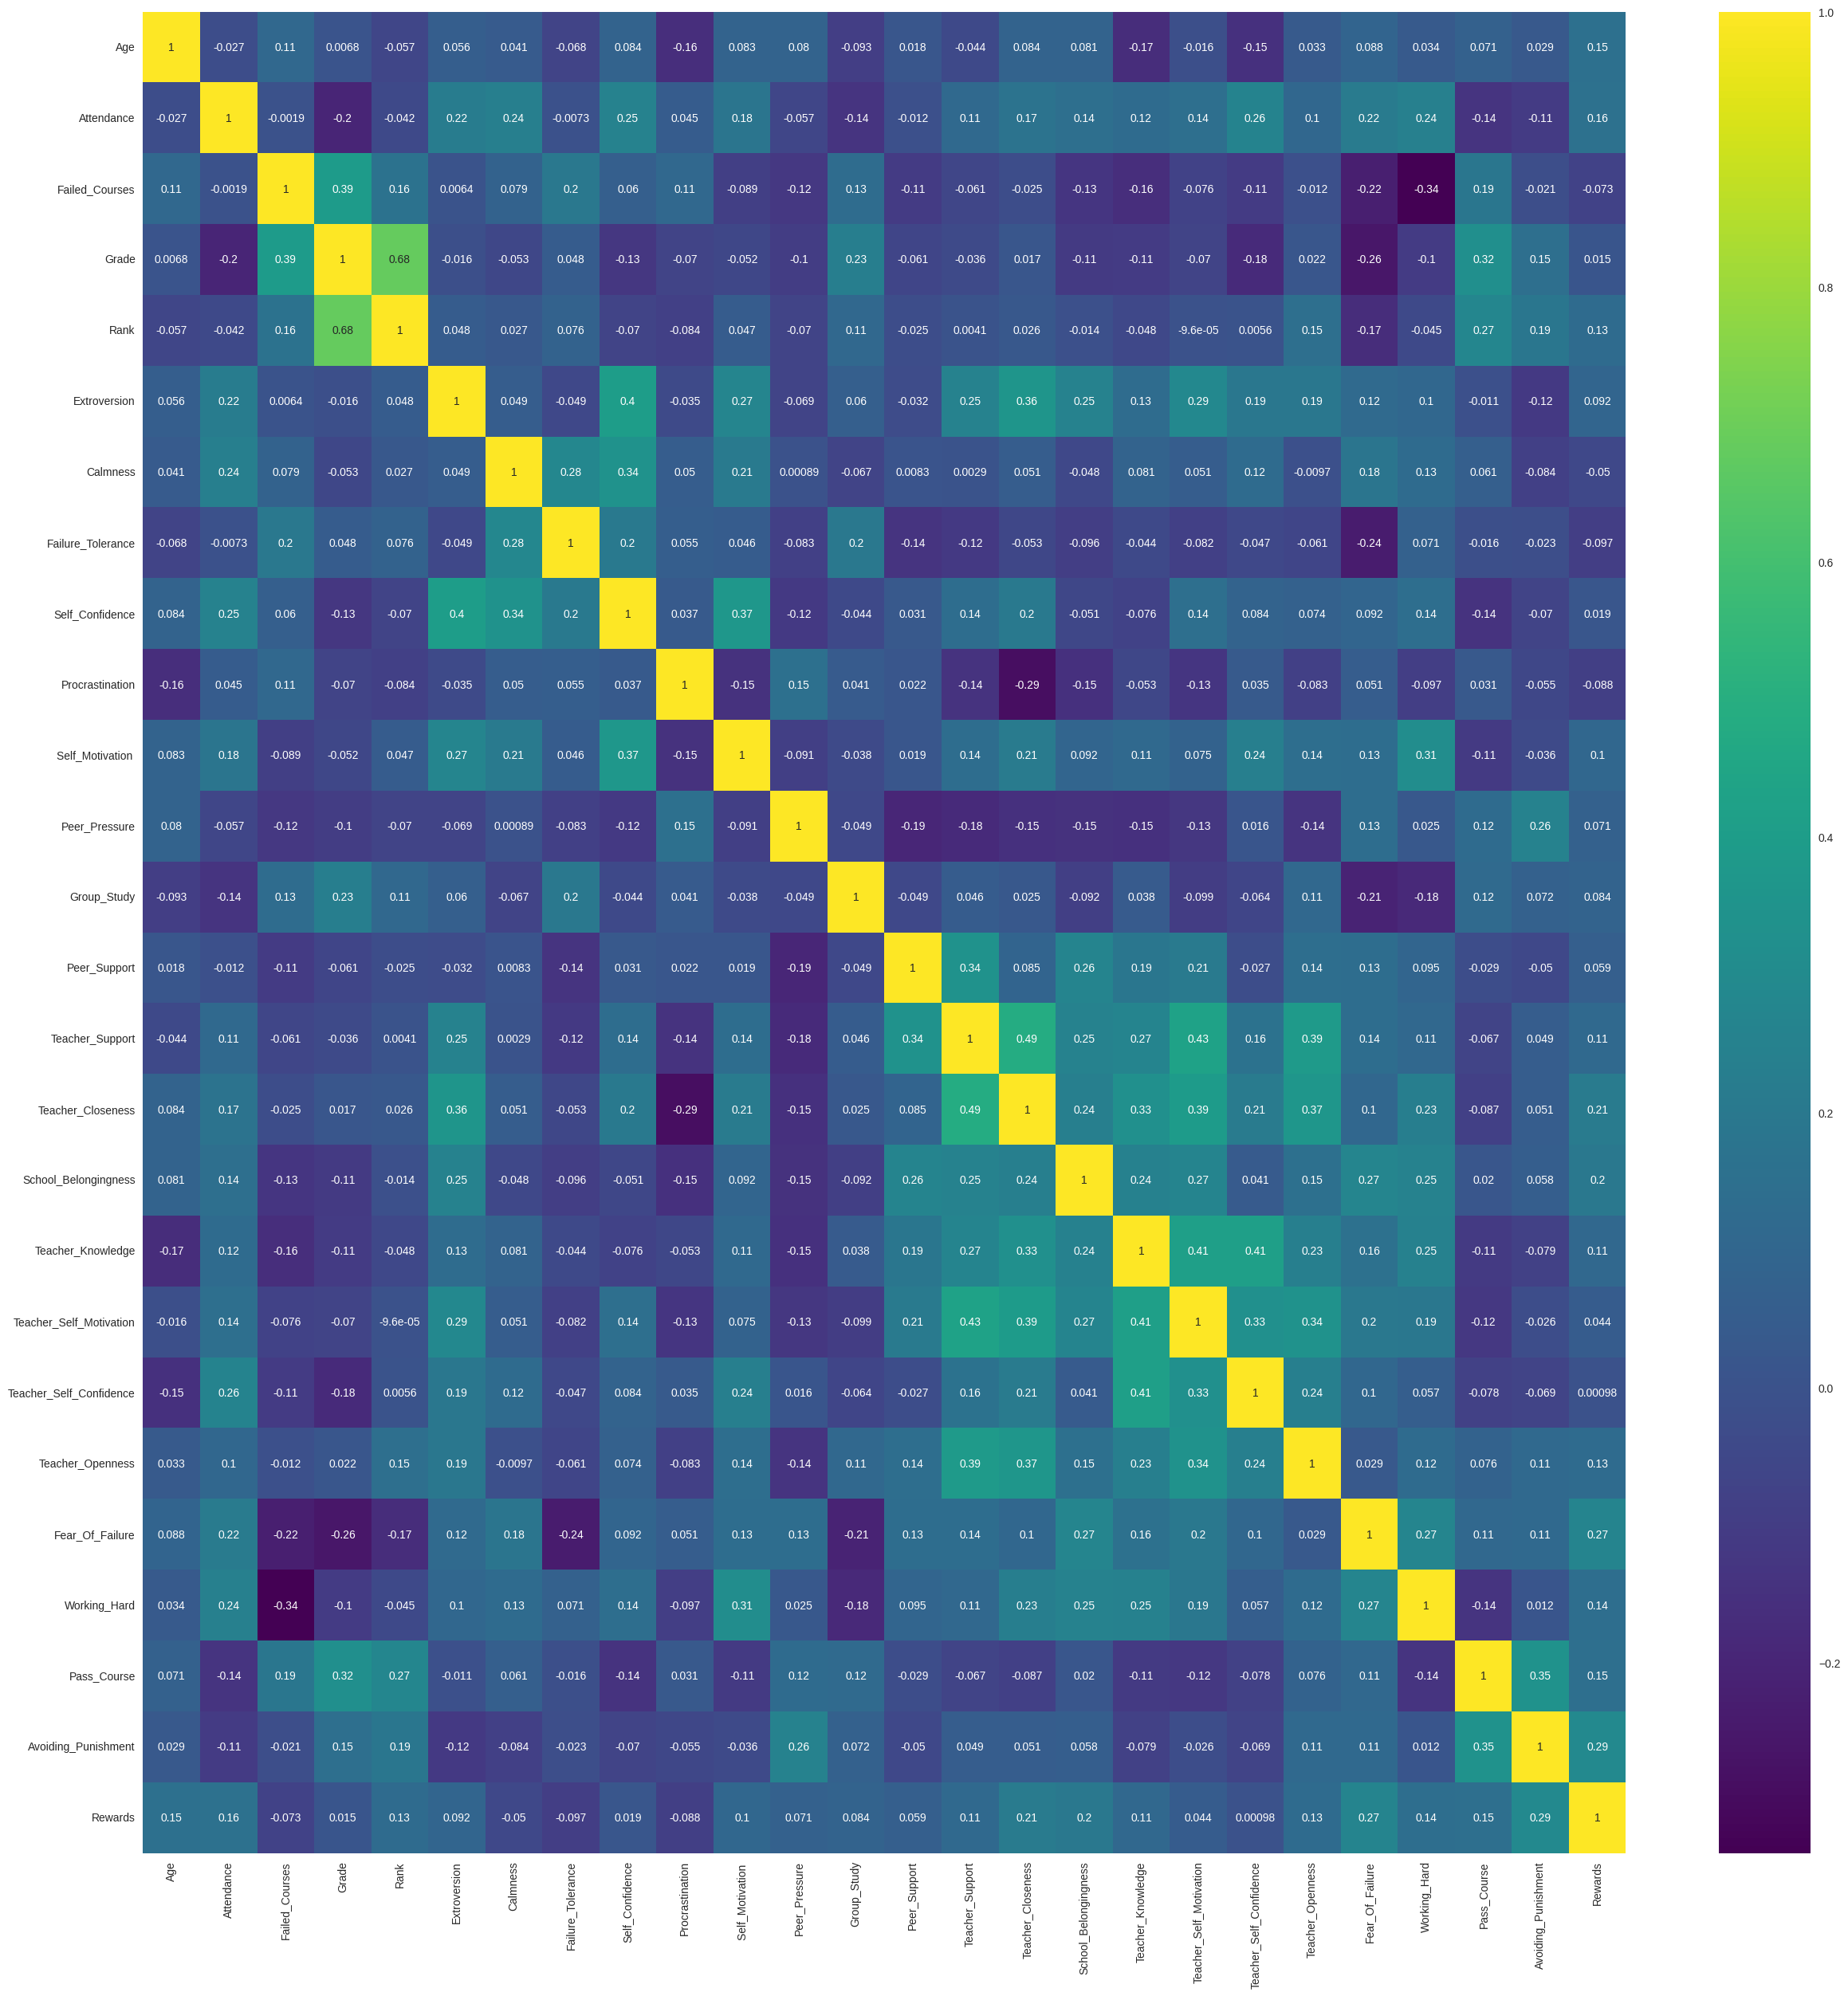

In [231]:
plt.figure(figsize=(30,30))

corr = df_corr.corr()
corr

sns.heatmap(corr, cmap='viridis', annot=True)

In [232]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [233]:
# Split the data into features (X) and target (y)
X = df_encoded.drop('Rank', axis=1)
y = df_encoded['Rank']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.972972972972973


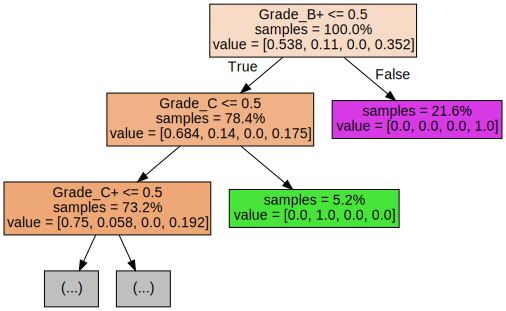

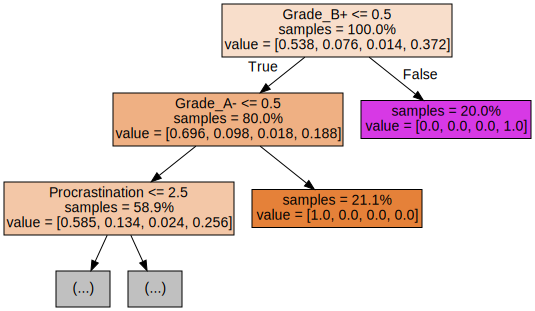

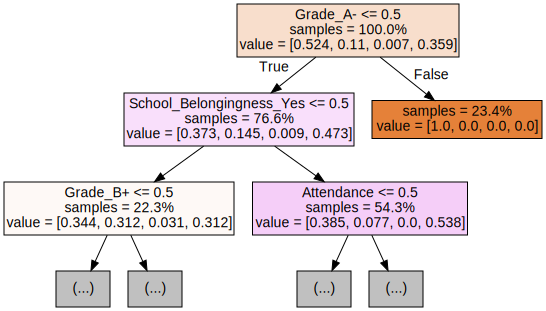

In [234]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

beginning of PCA

In [235]:

# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [236]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_

In [237]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression 
 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [238]:
# Predicting the test set result using
# predict function under LogisticRegression
y_pred = classifier.predict(X_test)

In [239]:
# making confusion matrix between
#  test set of Y and predicted value.
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred)

<ipython-input-240-db6bef8bffd0>:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


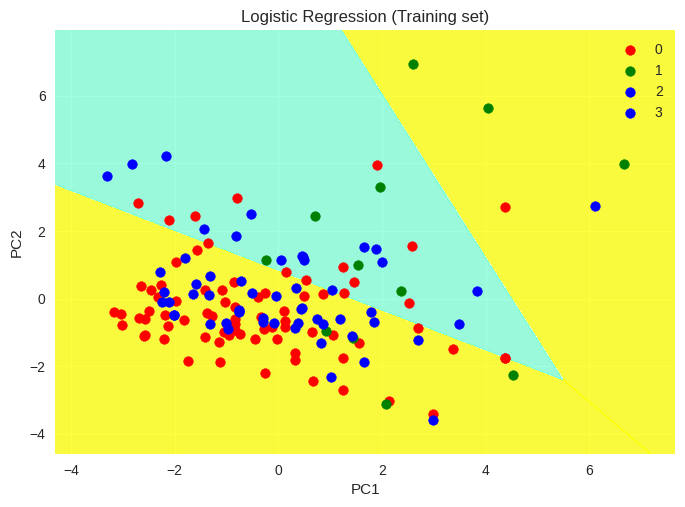

In [240]:
# Predicting the training set
# result through scatter plot
from matplotlib.colors import ListedColormap
 
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
 
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
 
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend
 
# show scatter plot
plt.show()

<ipython-input-241-9e08bc9942ac>:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


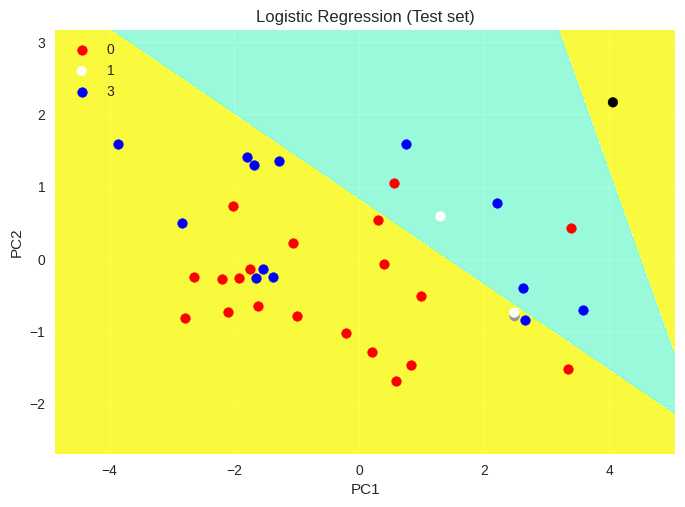

In [241]:
# Visualising the Test set results through scatter plot
from matplotlib.colors import ListedColormap
 
X_set, y_set = X_test, y_test
 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
 
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
 
# title for scatter plot
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()
 
# show scatter plot
plt.show()

In [242]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6216216216216216
